In [63]:
install.packages("ggplot2")
install.packages("sqldf")
library(ggplot2)
library(sqldf)

datasetname = "https://cli.fusio.net/cli/climate_data/webdata/dly532.csv"
dfdub<-read.csv(datasetname,skip=25)



The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpnB5IcF/downloaded_packages

The downloaded binary packages are in
	/var/folders/_3/c9jvmj8d3mq6r20_fxn1y1_r0000gn/T//RtmpnB5IcF/downloaded_packages


In [64]:

timedf<-sqldf("select date, maxtp, mintp, rain, ddhm, sun, gmin from dfdub")
timedf = sqldf("Select * from timedf where date>='01-jan-2000'")
timedf['ISODate']= timedf['date']
timedf$ISODate= 
as.POSIXct(
    strptime(
        timedf$ISODate, 
        format = "%d-%b-%Y"))#Note for month in mmm format, %b is the format.

timedf['month']=x_month <- format(timedf$ISODate, "%b")  #Note %m gives month number
timedf['year']=x_month <- as.numeric(format(timedf$ISODate, "%Y") ) #note %y gives 2-digit year
str(timedf)
timedf['decade']=timedf$year-timedf$year%%5
str(timedf)
unique(timedf$decade)
DecadeRain = sqldf("select decade, avg(rain) avgrain from timedf group by decade")

'data.frame':	28873 obs. of  10 variables:
 $ date   : chr  "02-jan-1942" "03-jan-1942" "04-jan-1942" "05-jan-1942" ...
 $ maxtp  : num  9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 4 ...
 $ mintp  : num  7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 -2.6 ...
 $ rain   : num  0.1 1.5 3.5 0.6 0 0 0 0.2 0 1.1 ...
 $ ddhm   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun    : num  0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 1.6 ...
 $ gmin   : num  6.7 7.2 3.4 0 -3.7 -1 0.2 0.9 -4.1 -9.5 ...
 $ ISODate: POSIXct, format: "1942-01-02" "1942-01-03" ...
 $ month  : chr  "Jan" "Jan" "Jan" "Jan" ...
 $ year   : num  1942 1942 1942 1942 1942 ...
'data.frame':	28873 obs. of  11 variables:
 $ date   : chr  "02-jan-1942" "03-jan-1942" "04-jan-1942" "05-jan-1942" ...
 $ maxtp  : num  9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 4 ...
 $ mintp  : num  7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 -2.6 ...
 $ rain   : num  0.1 1.5 3.5 0.6 0 0 0 0.2 0 1.1 ...
 $ ddhm   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun    : num  0 0.1 0.6 3.4 0.1 4 3

[1] 1940 1945 1950 1955 1960 1965 1970 1975 1980 1985 1990 1995 2000 2005 2010
[16] 2015 2020

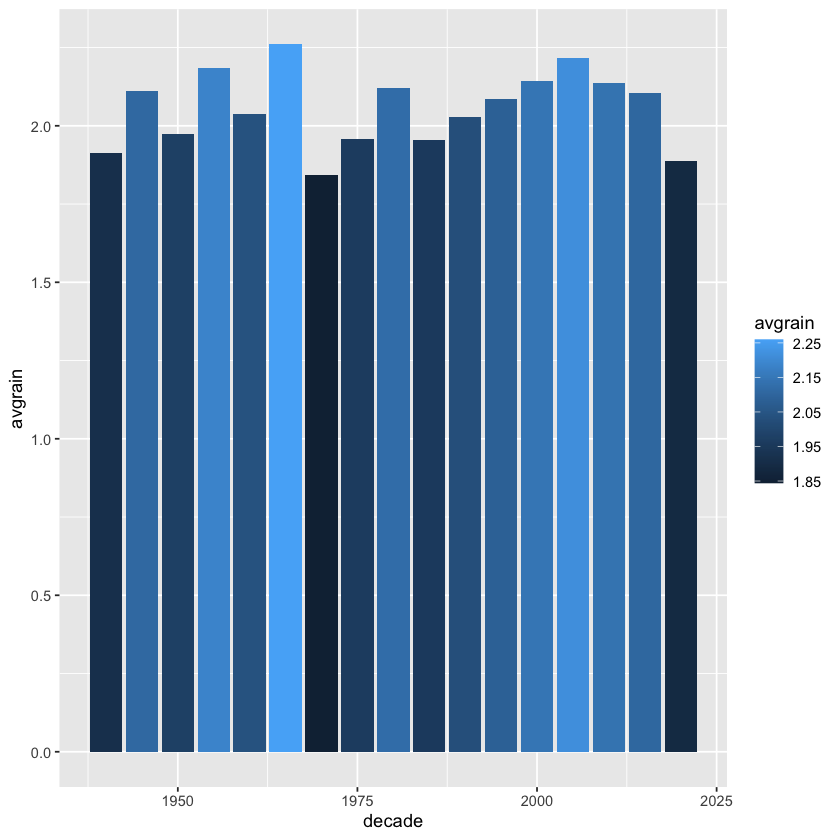

In [65]:
ggplot(DecadeRain, aes(x=decade, y=avgrain, fill = avgrain))+geom_bar(stat='identity')
#sqldf select month from timedf
JunRain = sqldf("select year, rain, month from timedf where month = 'Jun'")
MarRain = sqldf("select year, rain, month from timedf where month = 'Mar'")


df=sqldf("select * from JunRain union select * from MarRain")


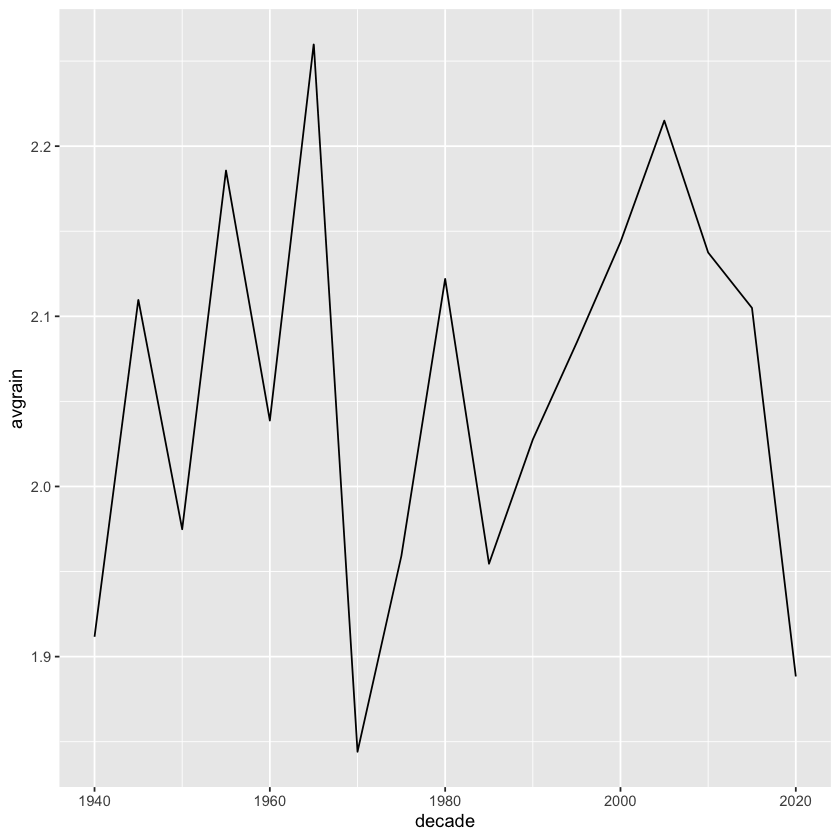

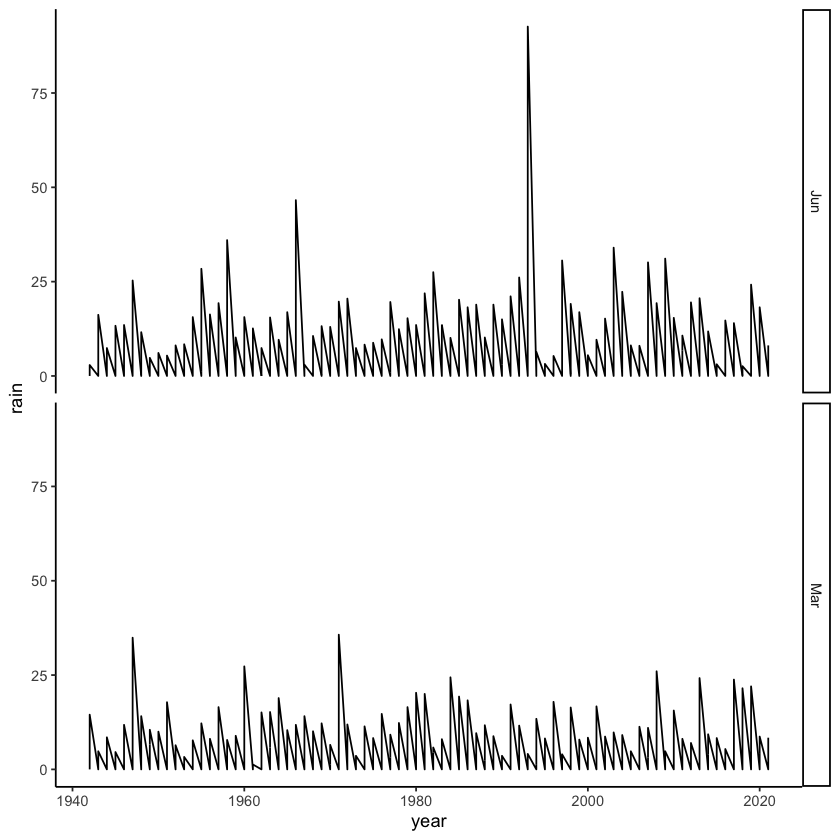

In [66]:
#create a line chart for the data
ggplot(DecadeRain, aes(x=decade, y=avgrain, fill = avgrain))+geom_line(stat='identity')

ggplot(df, aes(x=year, y=rain)) +

    facet_grid(facets = month~.) +
geom_line() +theme_classic()

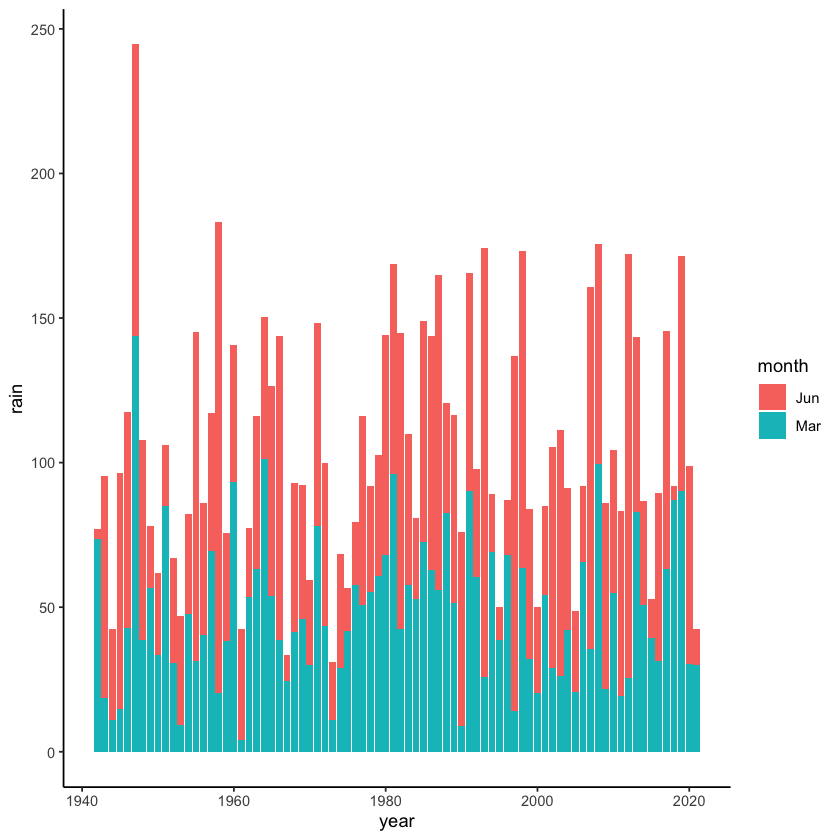

In [67]:
ggplot(df, aes(x=year, y=rain, fill=month)) +

geom_bar(stat='identity') +theme_classic()

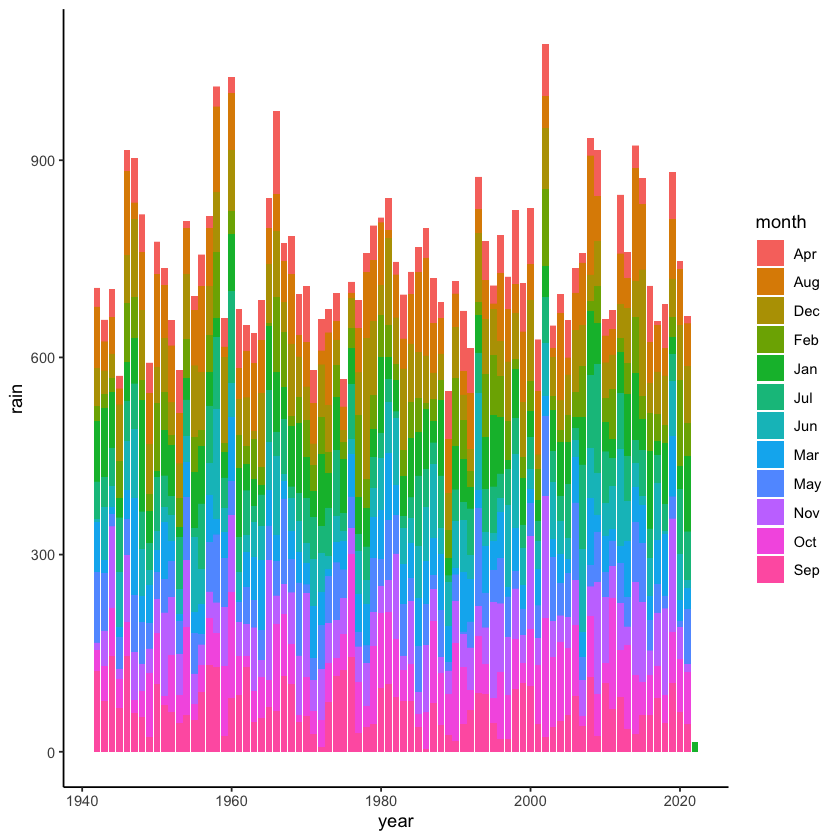

In [68]:
dfall = sqldf("select year, rain, month from timedf")
dfall$month=as.factor(dfall$month)

ggplot(dfall, aes(x=year, y=rain, fill= month)) +
    geom_bar(stat='identity') +theme_classic()

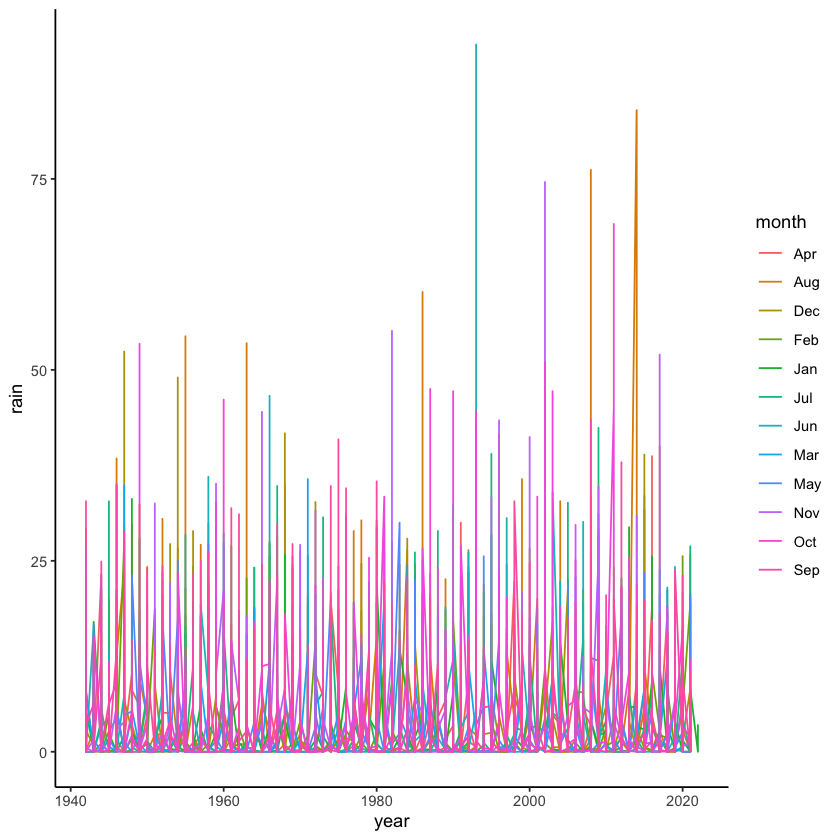

In [69]:
ggplot(data = dfall, aes(x = year, y = rain, fill = month, colour=month)) + 
    geom_line()+theme_classic()



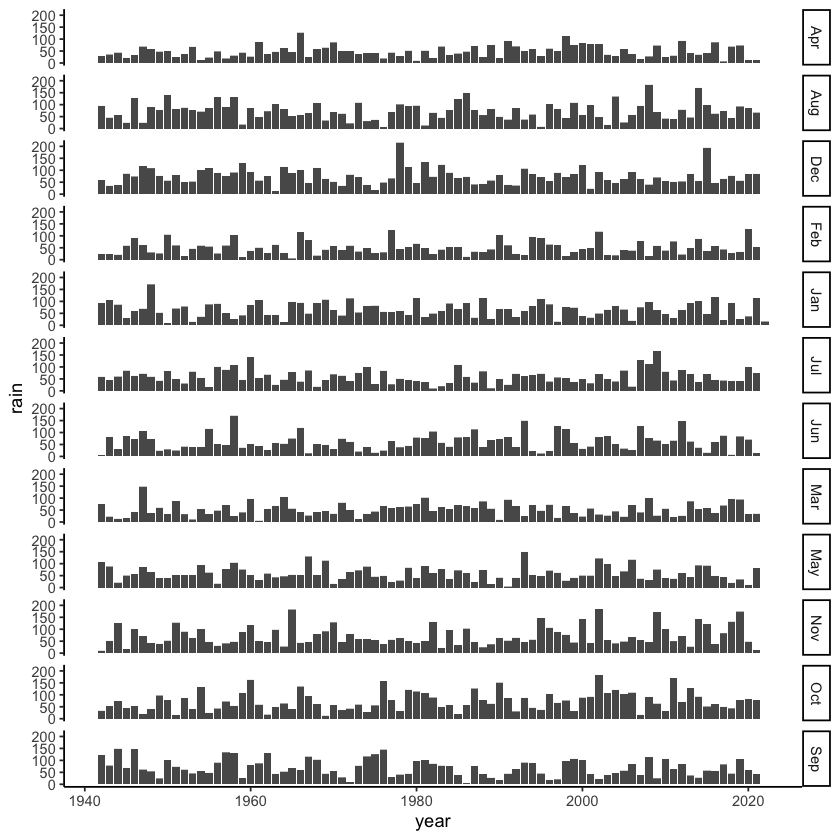

In [70]:

ggplot(data = dfall, aes(x = year, y = rain)) + 
geom_bar(stat='identity') +
facet_grid(facets = month~.) +
       theme_classic()



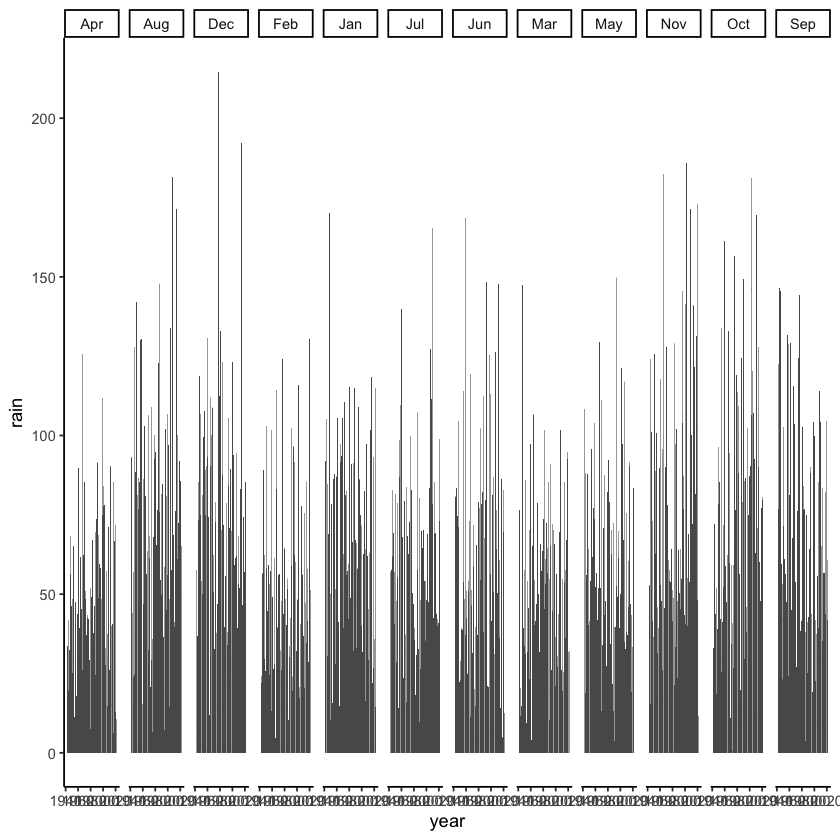

In [71]:
ggplot(data = dfall, aes(x = year, y = rain)) + 
geom_bar(stat='identity') +
facet_grid(facets = .~month) +
       theme_classic()

A: the relationship is 1 to one 
Cl: It is very hard to distinighused between nearby elements in the graph
Co: the graph is consistant
Ef: it is portrayed efficently 
Ne: The graph is a good way to show the data
Tr: The graph is truthful  